# Charge and tautomer enumeration

Simple notebook to investigate charge and tautomer enumeration.

The issues being:

1. Dimorphite is great at doing charge enumeration, but it's not easy to use as an API because of how it passes argparse arements into it's method calls. Here we can't get it to run in a notebook so have to resort to using it as a CLI application and parsing the file output.
2. If doing both charge and tautomer enumeration you can easily get a combinatorial explosion of results. In this example you end up with 34 different forms. 

In [50]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

import rdkit
print(rdkit.__version__)

2020.03.1


In [51]:
from scripts.dimorphite_dl import run_with_mol_list

In [52]:
enumerator = rdMolStandardize.TautomerEnumerator()

def enumerate_tautomers(mol):
    return enumerator.Enumerate(mol)
    
def enumerate_charges(mol, smiles):
    # this should work but doesn't in a notebook. Find out why
    ##orig_sys_argv = sys.argv[:]
    ##sys.argv = sys.argv[:1]
    #charges = run_with_mol_list([mol])
    ##sys.argv = orig_sys_argv
    
    # instead we'll use dimorphite with its CLI
    print('running dimorphite')
    opts = '--output_file output.smi --smiles "' + smiles + '"' 
    !python scripts/dimorphite_dl.py $opts
    with open('output.smi', 'r') as f:
        lines = f.readlines()
    mols = []
    for line in lines:
        s = line.strip()
        mols.append(Chem.MolFromSmiles(s))
    return mols

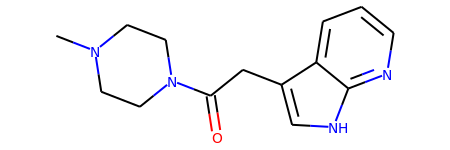

In [53]:
smiles = 'CN1CCN(C(=O)Cc2c[nH]c3ncccc23)CC1'
mol = Chem.MolFromSmiles(smiles)
mol

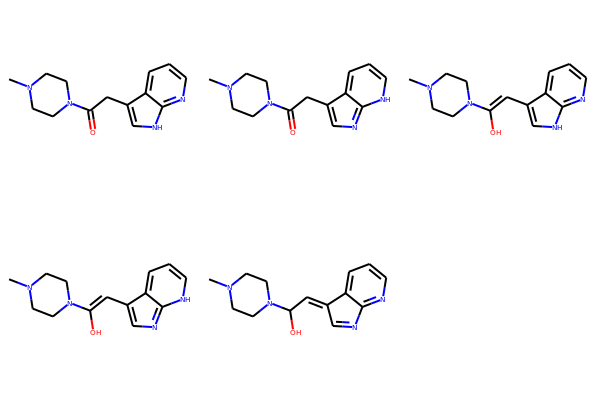

In [54]:
tauts = enumerate_tautomers(mol)
Draw.MolsToGridImage(tauts)
# we have 5 tautomers

running dimorphite
scripts/dimorphite_dl.py:580: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":

For help, use: python dimorphite_dl.py --help

If you use Dimorphite-DL in your research, please cite:
Ropp PJ, Kaminsky JC, Yablonski S, Durrant JD (2019) Dimorphite-DL: An
open-source program for enumerating the ionization states of drug-like small
molecules. J Cheminform 11:14. doi:10.1186/s13321-019-0336-9.


PARAMETERS:

 label_states: False
       max_ph: 8.4
       min_ph: 6.4
  output_file: output.smi
pka_precision: 1.0
       smiles: CN1CCN(C(=O)Cc2c[nH]c3ncccc23)CC1
  smiles_file: None
         test: False



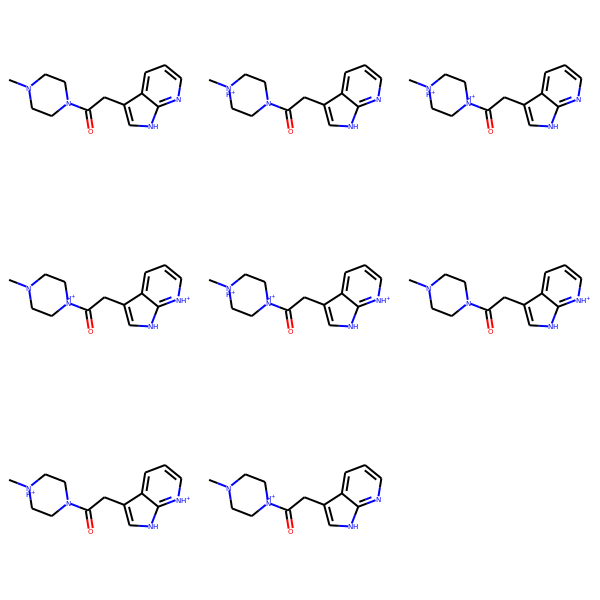

In [55]:
charges = enumerate_charges(mol, smiles)
Draw.MolsToGridImage(charges)
# we have 8 charge states

total: 34 unique: 34


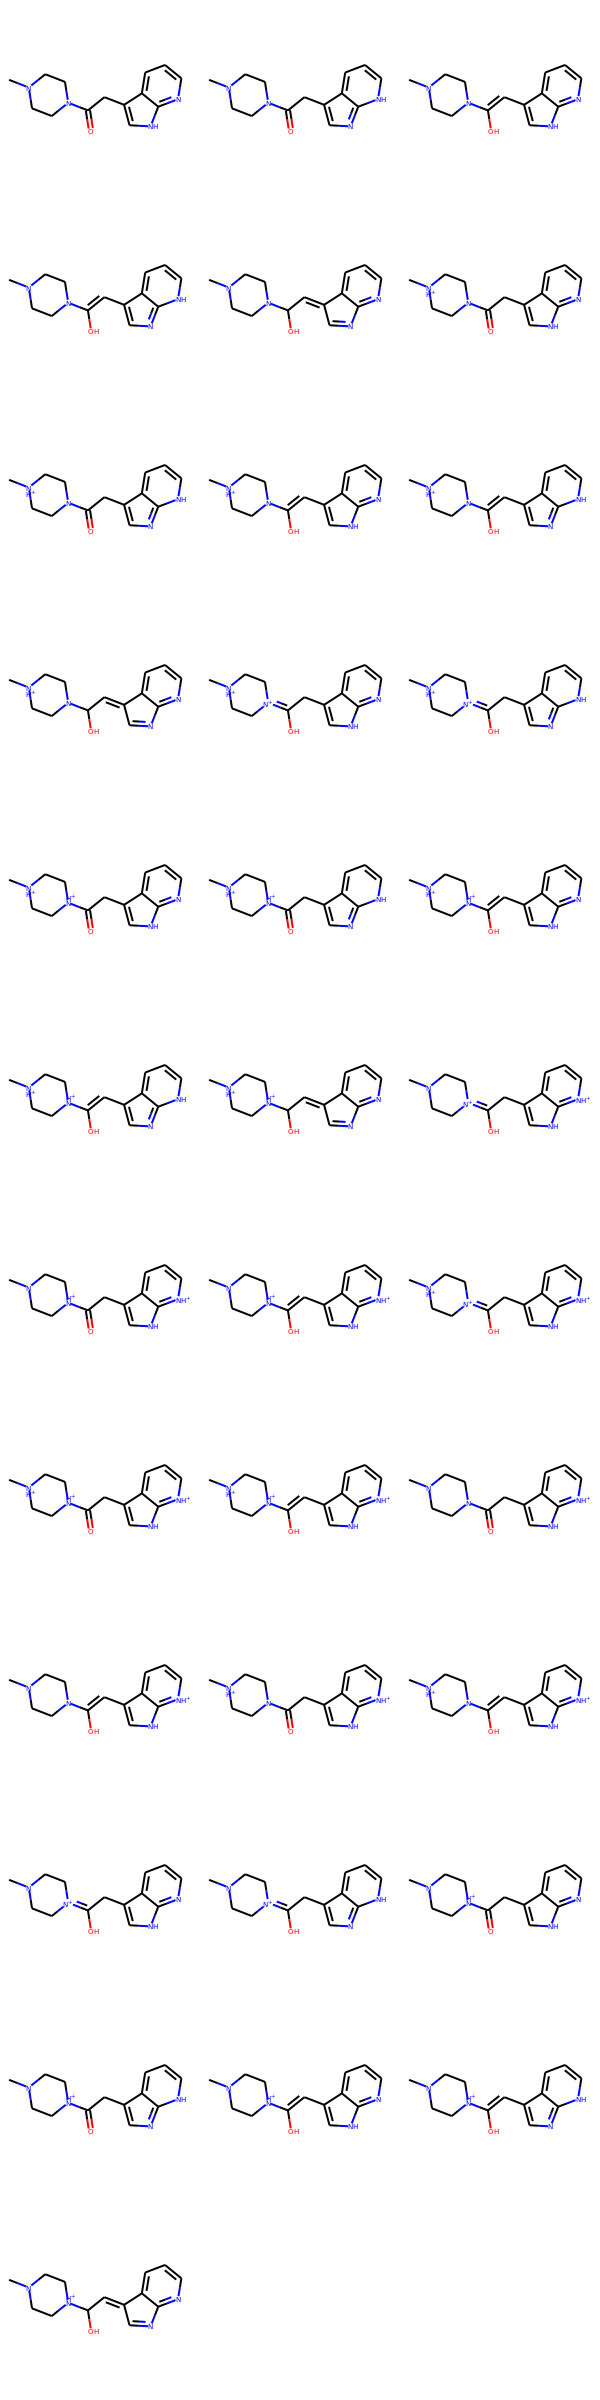

In [56]:
# now generate tautomers of the charge states
all_mols = []
for mol in charges:
    ts = enumerate_tautomers(mol)
    all_mols.extend(ts)

unique_mols = set()
for m in all_mols:
    unique_mols.add(Chem.MolToSmiles(m))
    
print('total:', len(all_mols), 'unique:', len(unique_mols))
# 34 unique mols - less than 5 * 8 = 40, but still a lot

Draw.MolsToGridImage(all_mols)

total: 34 unique: 34


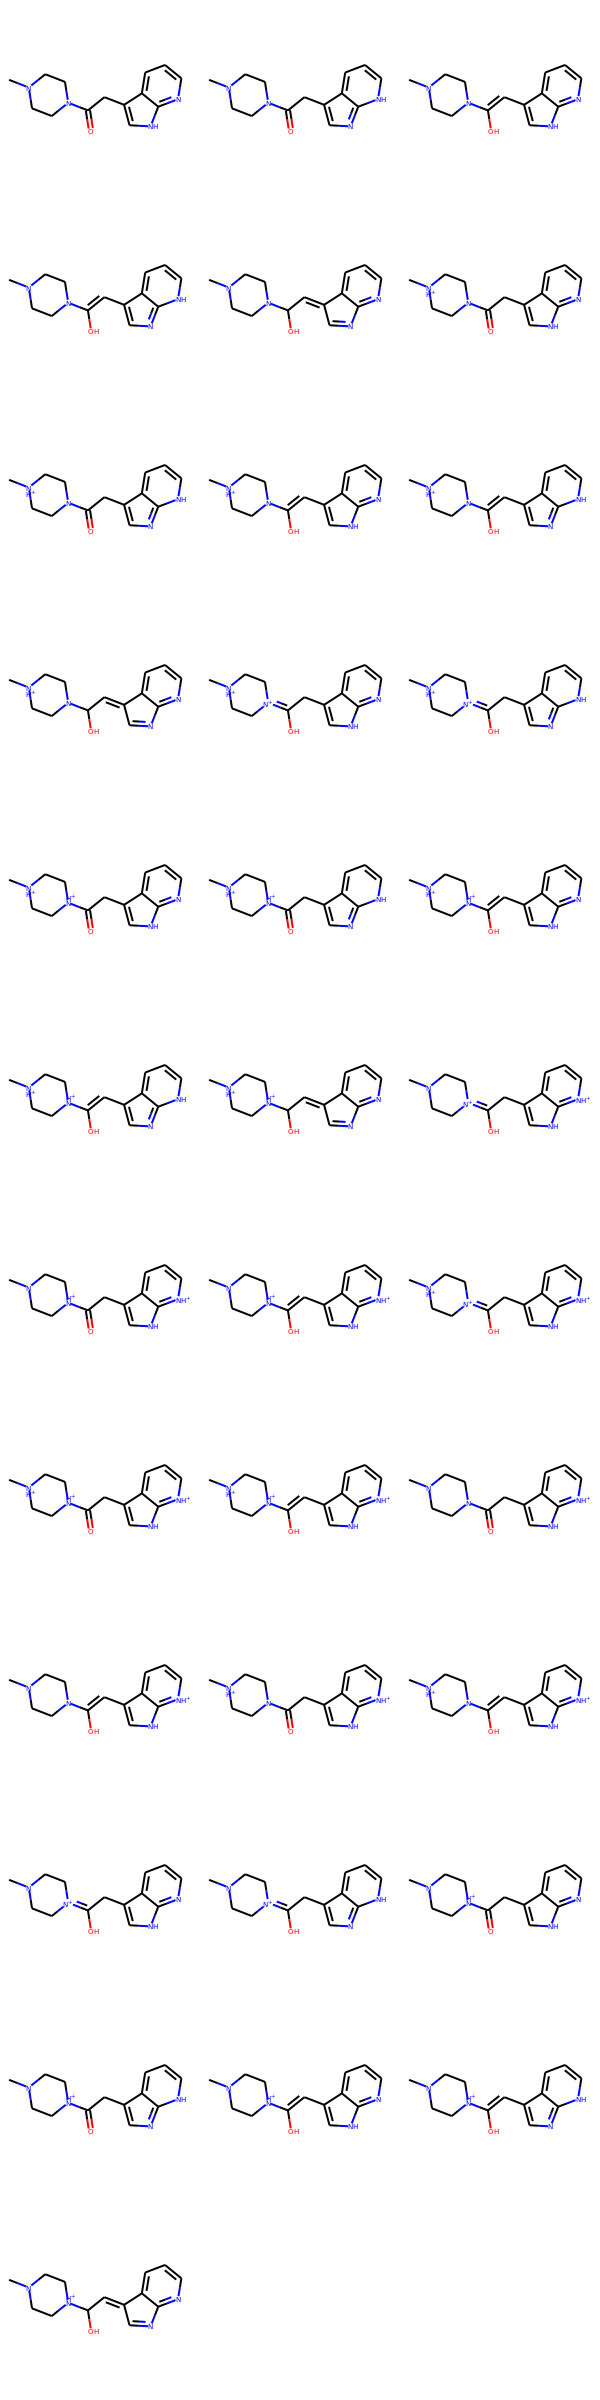

In [57]:
# now generate charge states of the tautomers
all_mols = []
for m in charges:
    ts = enumerate_tautomers(m)
    all_mols.extend(ts)

unique_mols = set()
for m in all_mols:
    unique_mols.add(Chem.MolToSmiles(m))
    
print('total:', len(all_mols), 'unique:', len(unique_mols))
# 34 unique mols again

Draw.MolsToGridImage(all_mols)